In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X = 2 * np.random.rand(200, 1)
y = 4 + 3 * X + np.random.randn(200, 1)


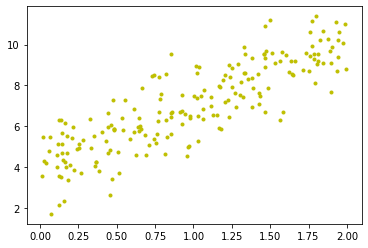

In [17]:
plt.plot(X,y,'y.')
plt.show()

In [18]:
X_b = np.c_[np.ones((200,1)), X] # add x0 (bias term) = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [19]:
theta_best

array([[4.01836987],
       [3.06189108]])

In [26]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # added bias to X-new

# making predictions by hand
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.01836987],
       [10.14215202]])

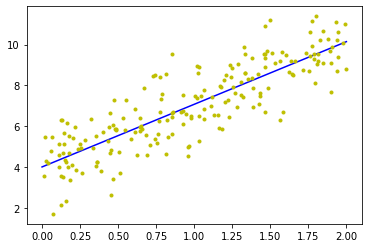

In [58]:
plt.plot(X_new, y_pred, "b-", label="Predictions")
plt.plot(X, y, "y.")
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.01836987]), array([[3.06189108]]))

In [29]:
alpha = 0.1
n_iterations = 100
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

In [30]:
theta

array([[4.0180701 ],
       [3.06215063]])

In [31]:
X_new_b.dot(theta)

array([[ 4.0180701 ],
       [10.14237136]])

In [34]:
thetapathbgd = []

def plotgradientdescent(theta, alpha, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - alpha * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=15)
#     plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

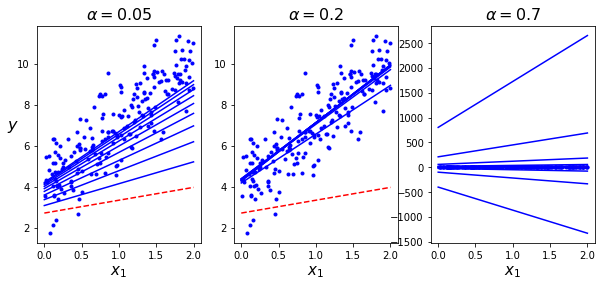

In [40]:
np.random.seed(101)
theta = np.random.randn(2, 1) # random initilization

plt.figure(figsize=(10, 4))
plt.subplot(131); plotgradientdescent(theta, alpha=0.05)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.subplot(132); plotgradientdescent(theta, alpha=0.2, theta_path=thetapathbgd)
plt.subplot(133); plotgradientdescent(theta, alpha=0.7)

plt.show()

In [52]:
thetapathsgd = []
m = len(X_b)
np.random.seed(101)

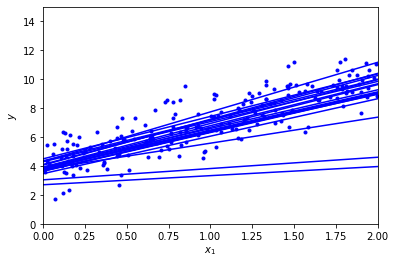

In [53]:
n_epochs = 50
t0, t1 = 5, 50 

def learning_step(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_step(epoch * m + i)
        theta = theta - alpha * gradients
        thetapathsgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([0,2,0,15])
plt.show()

In [51]:
thetapathmgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

t0, t1 = 200, 1000
def learning_step(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_step(t)
        theta = theta - alpha*gradients
        theta_path_mgd.append(theta)

In [54]:
theta

array([[4.02372818],
       [3.05306522]])

In [59]:
theta_path_bgd = np.array(thetapathbgd)
theta_path_sgd = np.array(thetapathsgd)
theta_path_mgd = np.array(thetapathmgd)

IndexError: too many indices for array

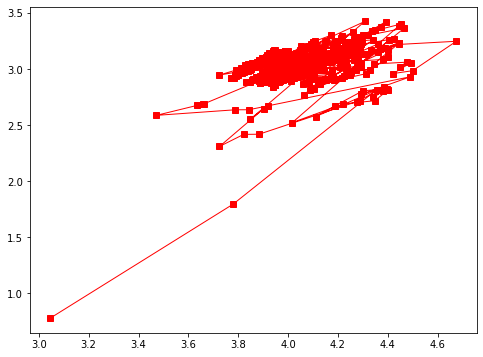

In [56]:
plt.figure(figsize=(8,6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini Batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=16)
plt.xlabel(r"$\theta_1$", fontsize=16, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()